# Programming Assignment 4

#### Research Questions:
1. Is there an association between the amount of protein and energy in a food?
2. Which food is the most nutritious?
3. Which food is the least nutritious?

In [15]:
import pandas as pd
import numpy as np
import requests
from pandas import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline

Food Data Central API Key = 47yTgghAvGpuOvyGco38HwaLgCB2XgR8DfjVY259

## Section A: FoodDataCentral API

Use your Food Data Central API Key to send an API request to search the database for the following list of Thanksgiving dinner foods: turkey, macaroni and cheese, mashed potatoes, bread stuffing, ham, sweet potato souffle, cranberry sauce, mixed vegetables, apple pie, pecan pie.

In [16]:
# set API key
apiKey = "47yTgghAvGpuOvyGco38HwaLgCB2XgR8DfjVY259"

# set parameter
params = {'api_key': apiKey}

In [25]:
# create list of foods we want to pass through to our API call
food_list=["turkey", "macaroni and cheese", "mashed potatoes", "bread stuffing", "ham", 
"sweet potato souffle", "cranberry sauce", "mixed vegetables", "apple pie", "pecan pie"]

In [38]:
all_foods = pd.DataFrame()

for food in food_list:
    #make the API call for each food
    response = requests.post(
        'https://api.nal.usda.gov/fdc/v1/search',
        params=params,
        json={'generalSearchInput': food}
    )
    item = response.json()
    #initialize rdf for each food
    rdf = pd.DataFrame()


    #extract the nutrient data
    for i in range(len(item['foods'])):
        df = pd.json_normalize(item['foods'][i]['foodNutrients'])

        # Concat nutrient data for all foods
        rdf = pd.concat([rdf, df], ignore_index=True)

    #recode variable values to simplify names
    nutrient_replacements = {
        'Energy': 'Energy',
        'Carbohydrate, by difference': 'Carbs',
        'Protein': 'Protein',
        'Fiber, total dietary': 'Fiber',
        'Total lipid (fat)': 'Fat',
        'Sodium, Na': 'Sodium',
        'Fatty acids, total saturated': 'Sat_Fatty_Acids',
        'Calcium, Ca': 'Calcium',
        'Iron, Fe': 'Iron',
        'Sugars, total including NLEA': 'Sugar',
        'Cholesterol': 'Chol',
        'Fatty acids, total trans': 'Trans_Fatty_Acids',
        'Vitamin C, total ascorbic acid': 'VitaminC',
        'Vitamin A, IU': 'VitaminA',
        'Potassium, K': 'Potassium',
        'Fatty acids, total polyunsaturated': 'Unsat_Fatty_Acids'
    }
    rdf['nutrientName'] = rdf['nutrientName'].replace(nutrient_replacements)

    agg_food = rdf[['nutrientName', 'value']].groupby(['nutrientName']).agg('mean')
    agg_food = agg_food.reset_index()
    agg_food.columns = ["nutrientName", "Value"]
    agg_food = agg_food[agg_food["nutrientName"].isin(['Energy', 'Carbs', 'Protein', 'Fiber', 'Fat' ])]
    agg_food["Food"] = food

    new = agg_food.pivot_table(index=["Food"], columns=['nutrientName'], values='Value')
    new.reset_index(inplace=True)

    all_foods = pd.concat([all_foods, new], ignore_index=True)
    

In [39]:
all_foods

nutrientName,Food,Carbs,Energy,Fat,Fiber,Protein
0,turkey,7.730800,393.138462,11.490000,0.457447,16.312800
1,macaroni and cheese,21.052600,334.382353,7.239000,1.010000,6.854400
2,mashed potatoes,45.782245,252.557692,4.100816,3.444898,4.947755
3,bread stuffing,28.324200,374.762712,9.665600,2.390000,8.452600
4,ham,8.770800,284.180328,8.514600,0.606977,13.470200
5,sweet potato souffle,24.430200,226.483871,6.099000,2.578000,3.044000
6,cranberry sauce,25.177292,215.328571,0.950776,1.876087,1.767600
7,mixed vegetables,9.723958,49.400000,0.010833,2.218367,1.695102
8,apple pie,37.520800,340.981818,13.601600,2.365306,3.115800
9,pecan pie,40.975400,499.074074,24.117400,2.442857,4.675200


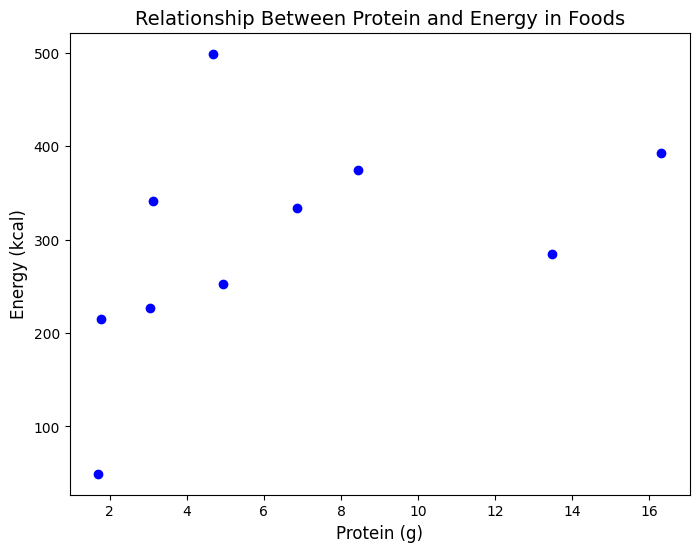

In [41]:
protein = all_foods['Protein']
energy = all_foods['Energy']

#create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(protein, energy_data, color='blue')

#add titles and labels
plt.title('Relationship Between Protein and Energy in Foods', fontsize=14)
plt.xlabel('Protein (g)', fontsize=12)
plt.ylabel('Energy (kcal)', fontsize=12)

plt.show()

The scatterplot shows the relationship between protein content and energy in foods. The points appear scatterd without a clear linear pattern, which suggests that there may be little to no correlation between protein and energy. Some foods with similar protein levels have varying energy values, indicating that other factors might contribu

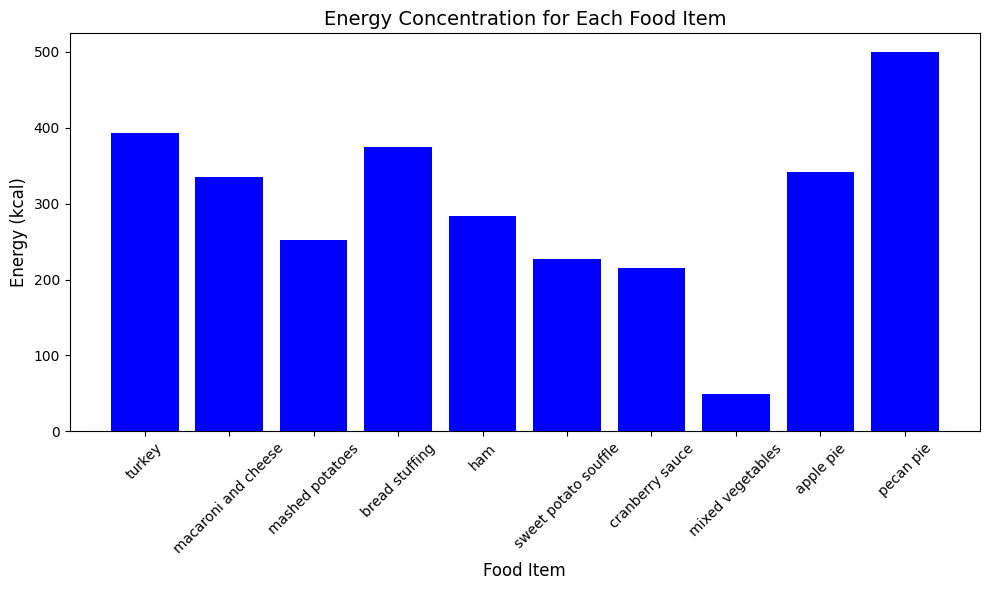

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(all_foods['Food'], all_foods['Energy'], color='blue')

# Title and labels
plt.title('Energy Concentration for Each Food Item', fontsize=14)
plt.xlabel('Food Item', fontsize=12)
plt.ylabel('Energy (kcal)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

This bar chart illustrates the energy concentration (in kilocalories) for various food items. Among the listed items, pecan pie has the highest energy content, while mixed vegetables have the lowest. The other foods fall somewhere in between, with turkey, bread stuffing, and apple pie standing out as high-energy options compared to others like mashed potatoes or cranberry sauce.

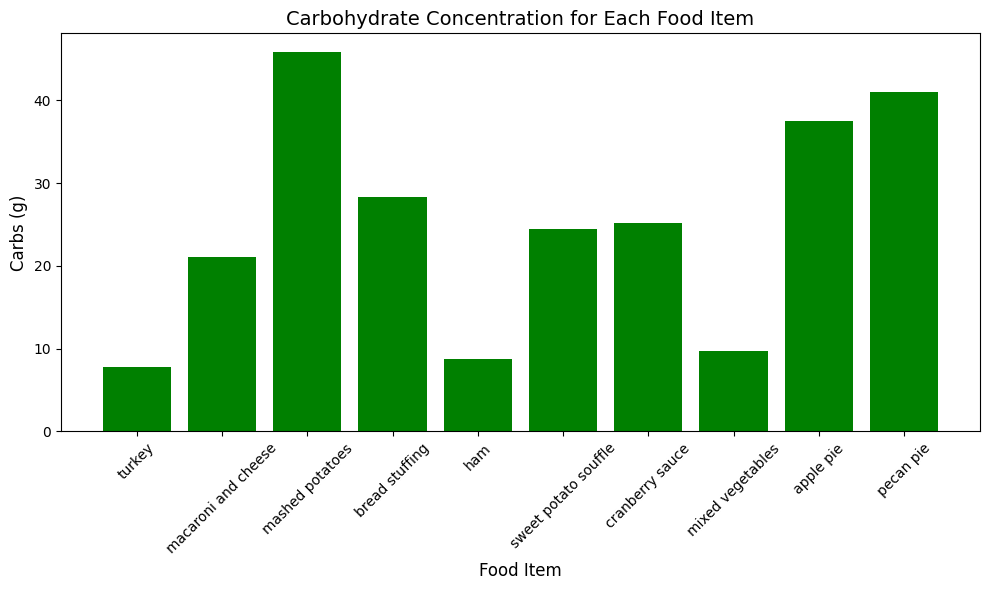

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(all_foods['Food'], all_foods['Carbs'], color='green')

# Title and labels
plt.title('Carbohydrate Concentration for Each Food Item', fontsize=14)
plt.xlabel('Food Item', fontsize=12)
plt.ylabel('Carbs (g)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

This bar chart shows the carbohydrate concentration (in grams) for various food items. It looks like mashed potatoes contains the most carbs out of all the listed food items while turkey has the least amount of carbs.  Pecan Pie and Apple pie also stands out as a higher-carb options compared to others like macaroni and cheese, bread stuffing, sweet potato souffle, cranberry suace, and mixed vegetables.

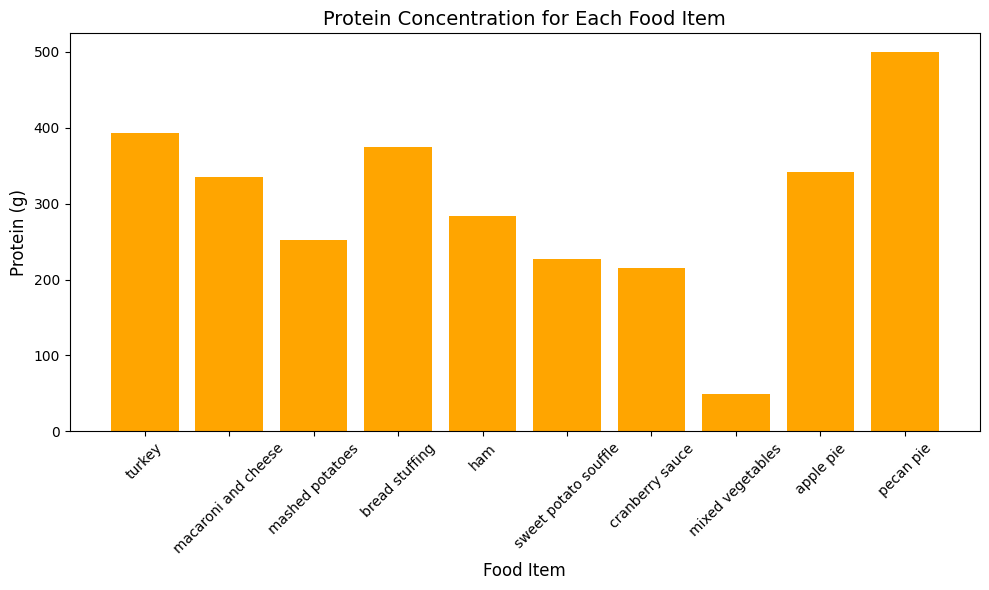

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(all_foods['Food'], all_foods['Energy'], color='orange')

# Title and labels
plt.title('Protein Concentration for Each Food Item', fontsize=14)
plt.xlabel('Food Item', fontsize=12)
plt.ylabel('Protein (g)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

This bar chart shows the protein concentration for each food item. It looks like out of all the listed food items, pecan pie has the most amount of protein (in grams) out of all the thanksgiving foods. Turkey is the next thanksgiving food that contains a decent amount of protein with bread stuffing coming close to turkey as well as applie pie. The other foods like ham, mashed potatoes, sweet potato souffle, and cranberry sauce falls in between the amount of protein that the foods contain. Out of all the thanksgiving foods, mixed vegetables has the lowest amount of protein concentration.

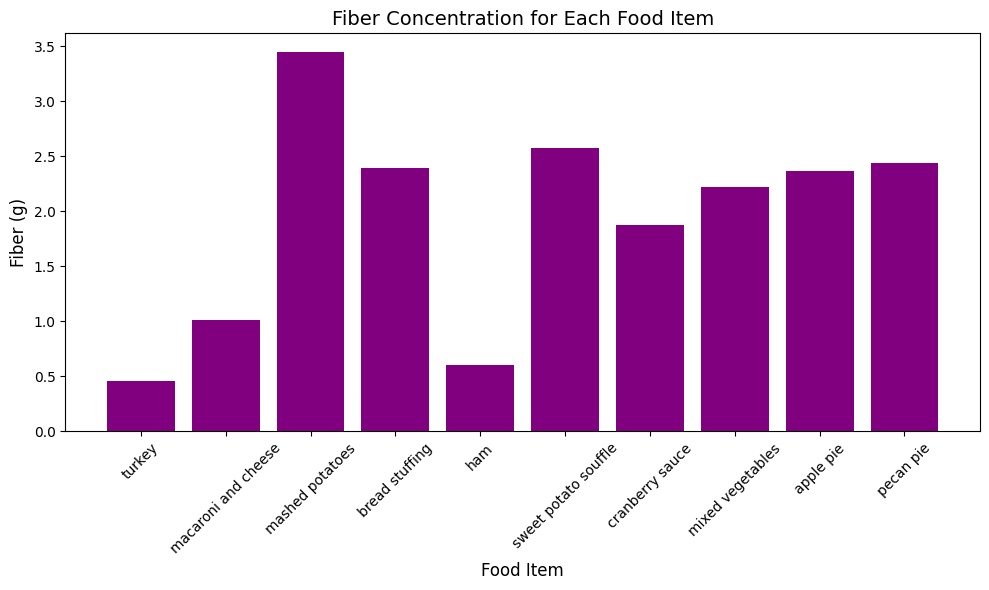

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(all_foods['Food'], all_foods['Fiber'], color='purple')

# Title and labels
plt.title('Fiber Concentration for Each Food Item', fontsize=14)
plt.xlabel('Food Item', fontsize=12)
plt.ylabel('Fiber (g)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The bar graph shows the fiber concentration that each food item has. It looks like mashed potatoes has the highest amount of fiber than other food items with turkey containing least amount of fiber concentration. Pecan pie and bread stuffing have the same amount of fiber concentration unlike the rest. Other food items like mixed vegetables, cranberry sauce, and apple pie falls somewhere in the middle.

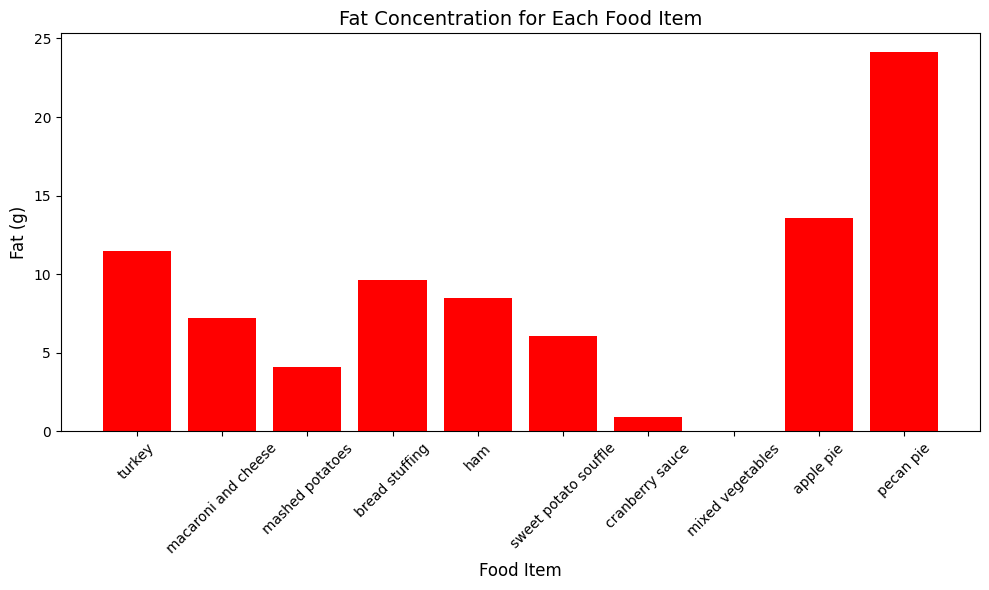

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(all_foods['Food'], all_foods['Fat'], color='red')

# Title and labels
plt.title('Fat Concentration for Each Food Item', fontsize=14)
plt.xlabel('Food Item', fontsize=12)
plt.ylabel('Fat (g)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

This graph shows the fat concentration for each food item. It looks like mixed vegetables got no fat concentration which I don't think is surprising considering it's mixed vegetables. Pecan pie, on the other hand, got the highest amount of fat concentration. The ingredients that are used to make pecan pie may have caused pecan pie to contain the highest amount of fat concentration. Other than mixed vegetables having no fat concentration, cranberry sauce got the second least amount of fat concentration while others fat concentration lie in between the graph of fat concentration.

**Answer the following questions**:.
*  Based on the graphs above, which of the Thanksgiving foods would you say is the healthiest/most nutritious, and why? There is no wrong answer here. Minimum 5 sentences.
*  
Based on the graphs above, which of the Thanksgiving foods would you say is the least healthiest/least nutritious, and why? There is no wrong answer here. Minimum 5 sentences

Based on the given graphs above, I would say mixed vegetables and turkey would be the most nutritious and healhtiest out of all the foods because I think they complement each other well in terms of consumption. For example, mixed vegetables have low protein, fat, and energy while turkey has somewhat of a high concentration of protein, fat, and energy. Together, these foods complement each other well, with turkey addressing the nutritional gaps in mixed vegetables and vice versa, offering a balanced combination for consumption. They both have low amount of carbohydrate which generally is a good thing in terms of following a strict diet. 

The least healthiest/least nutritous thanksgiving food would have to be pecan pie.
They contain the most amount of fat out of all the thanksgiving food option. If you think about how pecan pie is made, there is an unbelievelably high amount of sugar packed within the pie. One single slice of pecan pie can be a lot of calories. However, even though pecan pie is the least healthiest out of all the thanksgiving foods, people still enjoy it during this time of holiday. 

## Section B: Thanksgiving Food-Related Tweets

Import the food_tweets_mentions.csv dataset into your Jupyter Notebook.
* This dataset consits of a list of tweets that mentioned some of the many Thanksgiving food words on Thanksgiving Day. These tweets were collected using the Twitter Streaming API, which allows users to collect public tweets in real-time.
* Variables:
    * tweet_id - Unique identifier for a single tweet
    * food_mention - food word mentioned in the tweet
    * 
num_retweets - number of times the tweet was retweete
    * 
num_favorites - number of times the tweet was favorit
* Note: Actual tweet text is not shown for privacy reasonsedreasons

In [49]:
df = pd.read_csv("food_tweets_mentions.csv")

In [50]:
df.head()

,tweet_id,food_mention,num_retweets,num_favorites
0,1,turkey,955,621
1,2,turkey,318,124
2,3,turkey,357,787
3,4,turkey,615,328
4,5,turkey,764,672


Calculate the following descriptive statistics (These do NOT need to be saved to a new dataframe. Simply use functions to print out these statistics)
* Calculate the average number of retweets per tweet
* Calculate the average number of favorites per tweet
* Calculate the maximum number of retweets for a single tweet
* Calculate the maximum number of favorites for a single tweet
* In a narrative (no bullet points)
  * Report the descriptive statistics above in a well-written paragraph.

In [57]:
df['num_retweets'].mean()

496.8153526970954

In [58]:
df['num_favorites'].mean()

499.7240663900415

In [53]:
df['num_retweets'].max()

1000

In [54]:
df['num_favorites'].max()

999

The dataset of Thanksgiving-related tweets provides interesting insights into our user engagement through tweets and favorites. On average, tweets mentioning Thanksgiving foods were retweeted approximately 496.8 times and favorited around 499.7 times, which indicates a comparable level of engagement for both metrics. The maximum number of retweets for a single tweet was 1000, demonstrating a high level of interest or virality for certain food-related content. Similarly, the maximum number of favorties for asingle tweet reached 999, further highlighting the popularity of some tweets. These findings suggest that Thanksgiving-related content garners significant attention on social media platforms, potentially influenced by the cultural and seasonal releveance of the holiday.

_Create a histogram that shows the distribution of the number of retweets in the tweets sample. Your plot must include a title & proper axis labels._
* _interpret the results. Minimum 1 Sentence_

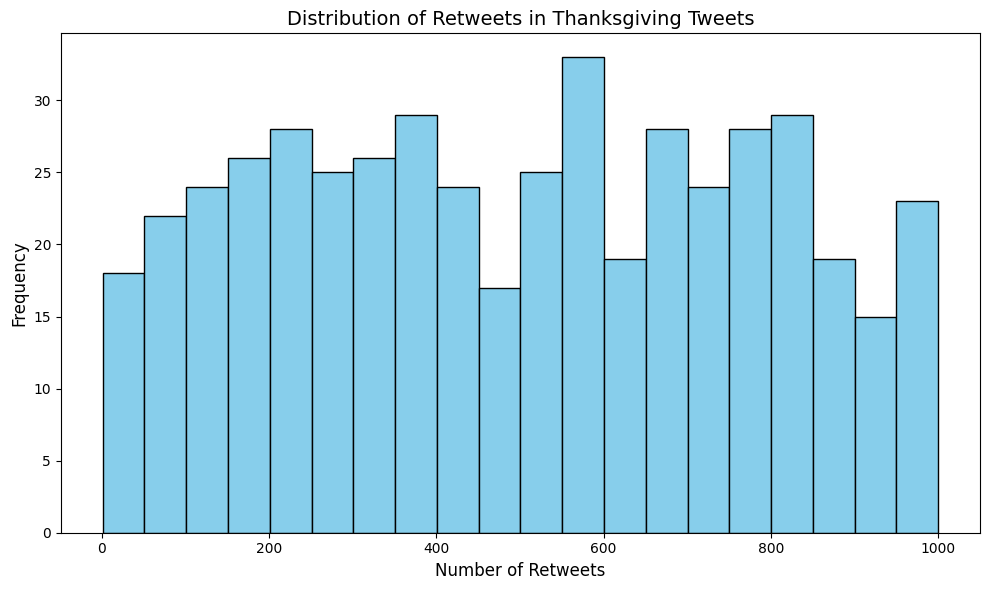

In [59]:
plt.figure(figsize =(10,6))
plt.hist(df['num_retweets'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Retweets in Thanksgiving Tweets', fontsize=14)
plt.xlabel('Number of Retweets', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

The distribution of retweets shows a fairy even spread, with a peak around 500-700 retweets, indicating that most tweets tend to receive moderate engagement in terms of retweets, while extreme values (very low or very high retweets) are less common. 

_Create a histogram that shows the distribution of the number of favorites in the tweets sample. Your plot must include a title & proper axis labels._
* _interpret the results. Minimum 1 Sentence_

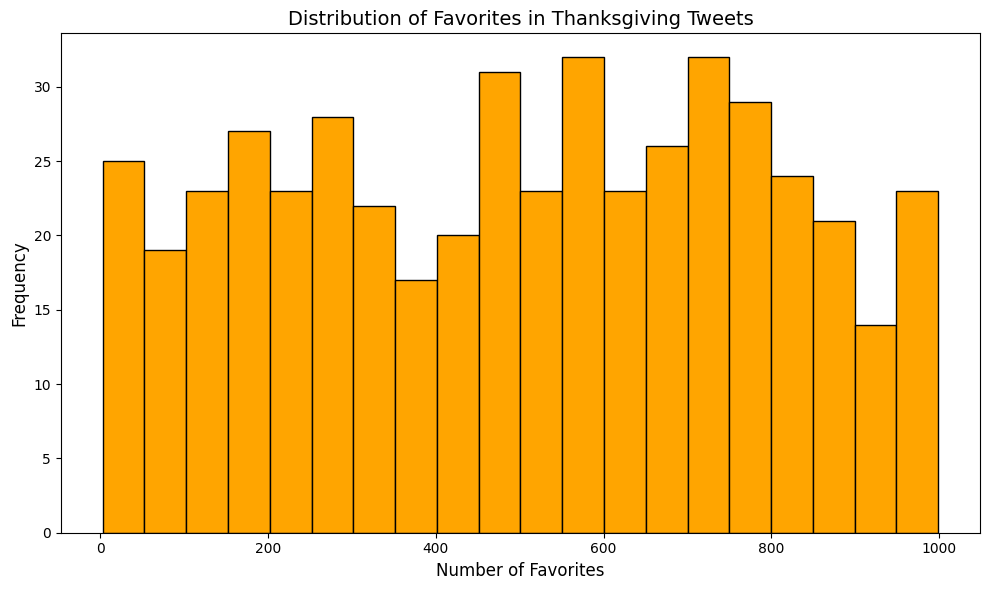

In [60]:
plt.figure(figsize =(10,6))
plt.hist(df['num_favorites'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Favorites in Thanksgiving Tweets', fontsize=14)
plt.xlabel('Number of Favorites', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

The distribution of favorites also shows an even spread, with a prominent peak around 600-800 favorites, suggesting that tweets are more frequently favorited at higher levels compared to beig retweeted.

***Subset the tweets dataset to those tweets where the number of retweets is greater than 200 **AND** the number of favorites is greater than 50.***
* _Name this dataframe 'food_tweets_subset'_

In [62]:
food_tweets_subset = df[(df['num_retweets'] > 200) & (df['num_favorites'] > 50)]
food_tweets_subset.head()

,tweet_id,food_mention,num_retweets,num_favorites
0,1,turkey,955,621
1,2,turkey,318,124
2,3,turkey,357,787
3,4,turkey,615,328
4,5,turkey,764,672


Using the subsetted dataset (**food_tweets_subset**), create an aggregated dataframe that includes the following:
* Number of tweets for each food item mentioned. Name this column "num_tweets"
* Total number of retweets for each food item mentioned. Name this column "total_num_retweets"
* Average number of favorites for each food item mentioned. Name this column "avg_num_favorites"
* Name the final dataset **food_tweets_subset_agg**
  * Hint: to get the final dataset, you can do this in multiple steps, or aggregate multiple columns in a single step.See https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/Links to an external site. for more info. 

In [65]:
food_tweets_subset_agg = food_tweets_subset.groupby('food_mention').agg(
    num_tweets=('tweet_id', 'count'),
    total_num_retweets=('num_retweets', 'sum'),
    avg_num_favorites=('num_favorites', 'mean')
).reset_index()

food_tweets_subset_agg.head()

,food_mention,num_tweets,total_num_retweets,avg_num_favorites
0,apple pie,8,3451,403.125000
1,bean casserole,14,7622,559.785714
2,bread stuffing,19,9713,536.000000
3,cranberry sauce,2,1640,170.000000
4,dinner rolls,7,4395,646.285714


## Section C: Combine FoodData Central API & Thanksgiving Food-Related Tweets Data

Merge the Food Data Central API data (final dataset from Section A) and Thanksgiving Twitter API data (final dataset from Section B) based on food items that appear in BOTH datasets.

In [66]:
merged_data = pd.merge(all_foods, food_tweets_subset_agg, left_on='Food', right_on='food_mention')
merged_data.head()

,Food,Carbs,Energy,Fat,Fiber,Protein,food_mention,num_tweets,total_num_retweets,avg_num_favorites
0,turkey,7.730800,393.138462,11.490000,0.457447,16.312800,turkey,23,14237,508.739130
1,macaroni and cheese,21.052600,334.382353,7.239000,1.010000,6.854400,macaroni and cheese,71,43920,582.830986
2,mashed potatoes,45.782245,252.557692,4.100816,3.444898,4.947755,mashed potatoes,3,1509,626.666667
3,bread stuffing,28.324200,374.762712,9.665600,2.390000,8.452600,bread stuffing,19,9713,536.000000
4,ham,8.770800,284.180328,8.514600,0.606977,13.470200,ham,44,24875,571.272727


Create a visualization that answers the following question:
* Is there a linear relationship between the amount of carbs in a food item (according to the FoodData Central API) and the average number of favorites on Twitter?
  * In a narrative (no bullet points): Describe the relationship (or lack thereof) shown in the visualization. Minimum 1 sentence.
  * Your plot must include a title & proper axis labels. 

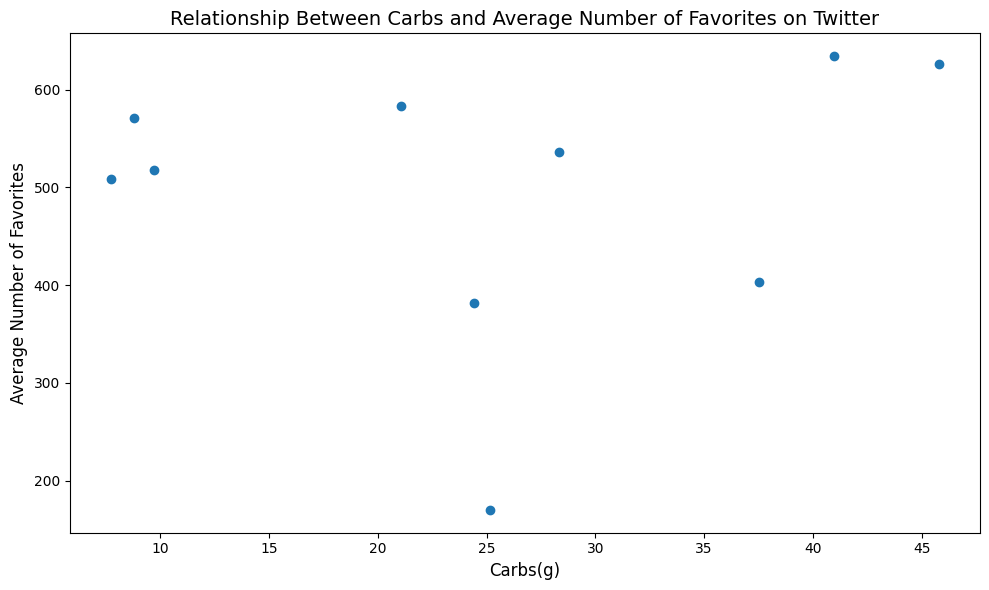

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Carbs'], merged_data['avg_num_favorites'])
plt.title('Relationship Between Carbs and Average Number of Favorites on Twitter', fontsize=14)
plt.xlabel('Carbs(g)', fontsize=12)
plt.ylabel('Average Number of Favorites', fontsize=12)
plt.tight_layout()
plt.show()

The scatter plot shows that there is no clear linear relationship between average number of favorites and carbs, as the data points are scattered without a consistent trend.